# Importando os dados dos filmes:



In [0]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

# Importando os dados das avaliações

In [0]:
avaliacoes = pd.read_csv('https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true')
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# Lendo as informações do nosso dataframe, como por exemplo quantas linhas existem, quantas colunas e quais são os tipos de variáveis

avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   usuarioId  100836 non-null  int64  
 1   filmeId    100836 non-null  int64  
 2   nota       100836 non-null  float64
 3   momento    100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [0]:
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

# Realizando o Join:

Temos dois datasets que gostaríamos de juntá-los, um se refere aos nomes dos filmes, sendo este um DataFrame e o outro se refere às notas média dos filmes (porém contém apenas o Id do filme e não o seu nome), sendo este uma Series. Para juntá-los podemos realizar um Join com a chave primária Id, já que ela existe nos dois datasets

In [0]:
# Dataframe Filmes

filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
# Serie notas_medias_por_filme

notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

# Obs: Como descobrir que tipo é o meu dataset?

Um dataset pode ser do tipo DataFrame ou Series, como descobrir, no caso de dúvidas, qual é o tipo do meu DataSet?

Para isso basta passar a linha de código:

*   type(nome_do_DataSet)



In [0]:
type(filmes)

pandas.core.frame.DataFrame

In [0]:
type(notas_medias_por_filme)

pandas.core.series.Series

# Continuando com o Join

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Resolvendo o desafio 2

* Trocando o nome da coluna ***nota*** por ***nota_media***

In [0]:
filmes_com_media['nota_media'] = filmes_com_media['nota'] # Aqui eu criei uma nova coluna chamada nota_media identica à coluna nota
filmes_com_media.drop('nota', axis = 1, inplace = True) # Aqui eu dropei a coluna nota e passei e o parâmetro inplace tornou esse drop de forma permanente

In [0]:
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
# Ordenando o DataFrame 

filmes_com_media.sort_values("nota_media", ascending=False, inplace = True)

# Resolvendo o desafio 1

Descobrir quantos filmes não tiveram avaliações


In [0]:
filmes_com_media

,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [0]:
filmes_com_media['nota_media'].isnull().sum()

18

Sim, o Paulo Silveira está certo, existem 18 filmes sem avaliações, além disso, no próximo passo vamos descobrir quais são esses filmes

In [0]:
# Esses são sos 18 filmes que não possuem avaliações

filmes_com_media[filmes_com_media['nota_media'].isnull()]

,filmeId,titulo,generos,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# Resolvendo o desafio 3

Colocar o número de avaliações por filme.

Nesse caso, vou criar uma nova coluna no dataframe ***filmes_com_media*** com o número de avaliações

In [0]:
# Criei um DataFrame auxiliar ('aux') para extrair o número de avaliações por filme

aux = avaliacoes.groupby('filmeId').count().sort_values('nota', ascending = False).reset_index()
aux.head()

,filmeId,usuarioId,nota,momento
0,356,329,329,329
1,318,317,317,317
2,296,307,307,307
3,593,279,279,279
4,2571,278,278,278


In [0]:
avaliacoes_por_id = aux[['filmeId','nota']]
avaliacoes_por_id.columns = ['filmeId','número_de_avaliacoes']
avaliacoes_por_id.set_index('filmeId', inplace=True)
avaliacoes_por_id

# Aqui eu criei um DataFrame que contém o número de avaliações por Id de filme

,número_de_avaliacoes
filmeId,
356,329
318,317
296,307
593,279
2571,278
...,...
4093,1
4089,1
58351,1


In [0]:
avaliacoes_por_id[avaliacoes_por_id['número_de_avaliacoes'] == 1]

,número_de_avaliacoes
filmeId,
101423,1
164881,1
1661,1
170993,1
101074,1
...,...
4093,1
4089,1
58351,1


In [0]:
filmes_com_media = filmes_com_media.join(avaliacoes_por_id, on = 'filmeId')
filmes_com_media

,filmeId,titulo,generos,nota_media,número_de_avaliacoes
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


# Resolvendo o desafio 4

Arredondar a coluna ***nota_media*** do DataFrame ***filmes_com_media*** para duas casas decimais

In [0]:
# Com essa visualização da tabela, podemos perceber que as notas médias apresentam várias casas decimais

filmes_com_media[filmes_com_media['nota_media'] < 5 ]

,filmeId,titulo,generos,nota_media,número_de_avaliacoes
4396,6460,"Trial, The (Procès, Le) (1962)",Drama,4.900000,5.0
5580,26810,Bad Boy Bubby (1993),Drama,4.833333,3.0
8536,115122,What We Do in the Shadows (2014),Comedy|Horror,4.833333,3.0
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.750000,8.0
2424,3224,Woman in the Dunes (Suna no onna) (1964),Drama,4.750000,4.0
...,...,...,...,...,...
9271,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,0.500000,1.0
7553,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.500000,1.0
6503,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,0.500000,1.0
5210,8494,"Cincinnati Kid, The (1965)",Drama,0.500000,1.0


In [0]:
# Com essa linha de código é possível arredondar a coluna 'nota_media' para duas casas decimais

filmes_com_media = filmes_com_media.round({'nota_media':2})

In [0]:
# Agora podemos ver que a coluna 'nota_media' tem duas casas decimais

filmes_com_media[filmes_com_media['nota_media'] < 5 ]

,filmeId,titulo,generos,nota_media,número_de_avaliacoes
4396,6460,"Trial, The (Procès, Le) (1962)",Drama,4.90,5.0
5580,26810,Bad Boy Bubby (1993),Drama,4.83,3.0
8536,115122,What We Do in the Shadows (2014),Comedy|Horror,4.83,3.0
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,4.75,8.0
2424,3224,Woman in the Dunes (Suna no onna) (1964),Drama,4.75,4.0
...,...,...,...,...,...
9271,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,0.50,1.0
7553,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.50,1.0
6503,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,0.50,1.0
5210,8494,"Cincinnati Kid, The (1965)",Drama,0.50,1.0


# Resolvendo o desafio 5 e 6

Descobrir os gêneros únicos, por exemplo:

Filme x tem o gênero 'Comédia/Ação/Terror', quebrar esse único gênero em três gêneros

In [0]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes["generos"].str.get_dummies('|')
generos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Aqui temos quais são os gêneros e quantas vezes eles apareceram

generos = generos.sum().sort_values(ascending = False)

# Desafio 7:

Plotar o gráfico de aparições de cada gênero

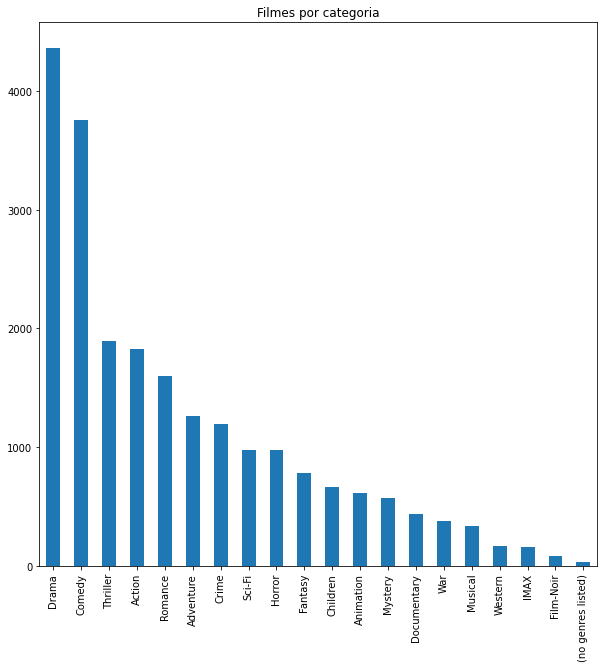

In [0]:
generos.plot(
    kind = 'bar',
     figsize = (10,10),
     title = 'Filmes por categoria')
plt.show()